In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys

import numpy as np

import astropy.units as u
from astropy import wcs
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.visualization import make_lupton_rgb
from astropy.utils.data import download_file, clear_download_cache

import matplotlib.pyplot as plt

In [53]:
from unagi import hsc
from unagi import mask
from unagi import config
from unagi import plotting
from unagi.task import hsc_cutout

s18a = hsc.Hsc(dr='dr2', rerun='s18a_wide')

### Example of a mask plane

# Retrieving cutout image in filter: i


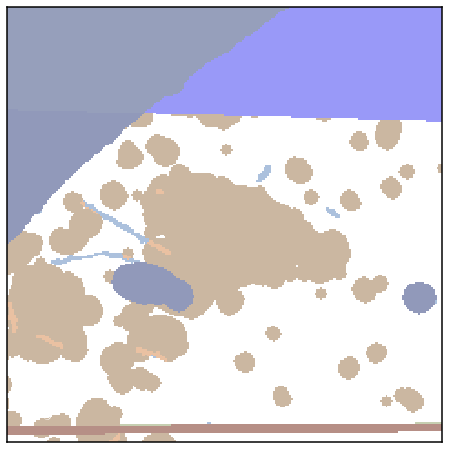

In [18]:
# Download an example mask plane
coord = SkyCoord(150.0913, 2.2059, frame='icrs', unit='deg')

cutout_test = hsc_cutout(coord, cutout_size=20.0 * u.arcsec, filters='i', archive=s18a, 
                         use_saved=False, verbose=True, save_output=False, mask=True)

mask_cmap = plotting.random_cmap(256)

_ = plotting.display_single(cutout_test[2].data, scale='linear', cmap=mask_cmap, alpha=0.6)

In [57]:
mask_test = mask.Mask(bitmask)

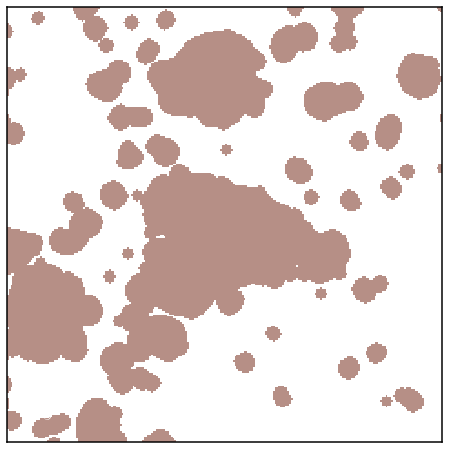

In [58]:
_ = plotting.display_single(mask_test.mask_decode[:, :, 5].astype(float), 
                            scale='linear', cmap=mask_cmap, alpha=0.6)

In [99]:
%%timeit 

mask_test = mask.Mask(bitmask)

3.14 ms ± 36.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [117]:
s18a_mask = mask.BitMasks(data_release='s18a')

mask_test = mask.Mask(bitmask)

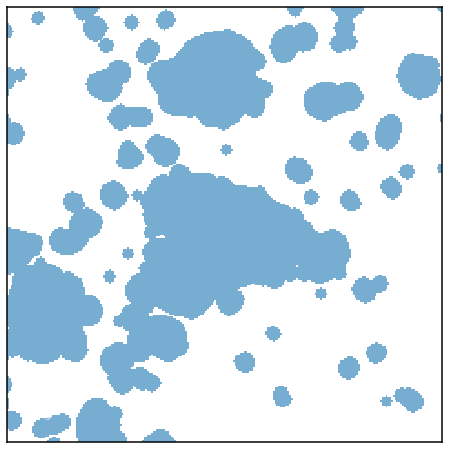

In [130]:
_ = plotting.display_single(mask_test.extract('DETECTED', show=True), 
                            scale='linear', cmap=mask_test.mask_cmap('DETECTED'), 
                            alpha=0.6)

In [126]:
%%timeit

_ = mask_test.extract('INTRP')

6.77 µs ± 191 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
